In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv' )
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.shape

(550068, 12)

In [4]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
test.shape

(233599, 11)

## Merging the train and test data set

In [6]:
df = train.append(test)
df.head()

C:\Users\seher\AppData\Local\Temp\ipykernel_10072\3161495879.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.shape

(783667, 12)

## Here in train we have 12 columns and the target variable is Purchase while in test data set we are missing the target variable which is Purchase

#### That's why we have empty values in purchase column bcz of this

In [8]:
len(train.columns)

12

In [9]:
len(test.columns)

11

## Check for missing values

In [10]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

## Here we got many missing values in product category data set and purchase 
#### let's check values in product_category_2 and product_category_3

In [11]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [12]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

## Handling missing values 
#### Here we have some how discrete values, so in that case we will prefer to fill na with the most occuring values 
#### means that we will use mode here

In [13]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [14]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [15]:
type(df['Product_Category_2'].mode())

pandas.core.series.Series

In [16]:
df['Product_Category_2'].mode()[0]

8.0

In [17]:
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [18]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [19]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace = True)

## here we have null values in target variable bcs we merge test and train 
#### we will seperate it after performing the preprocessing 

In [20]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

## Check the whole data set

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [22]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.265541,14.988858,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,4.301427,2.740792,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Checking for Categorical values

In [23]:
categorical_columns = [ feature for feature in df.columns if df[feature].dtype == "O"]
categorical_columns    

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [24]:
df[categorical_columns].head(3)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2


## let first look into product id

len(df['Product_ID'].unique())

## let's drop it
df.drop('Product_ID', axis = 1, inplace = True)
df.shape

## Dealing with gender 

In [25]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

## here we just have 2 values we can use one hot encoding or we can just map values 

In [26]:
df['Gender'] = df['Gender'].map({'F' :0 , 'M' : 1})

## Age Column1

In [27]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [28]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6, '55+':7})

## Dealing with city Category

In [29]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [30]:
dummies = pd.get_dummies(df['City_Category'], drop_first= True)

In [31]:
dummies.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [32]:
df = pd.concat([dummies, df], axis = 1)
df.head()

,B,C,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0
1,0,0,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0
3,0,0,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0
4,0,1,1000002,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0


In [33]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

### Dealing with Stay_In_Current_City_Years

In [34]:
df[ 'Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [35]:
df['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [36]:
df['Stay_In_Current_City_Years']=df[ 'Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\seher\AppData\Local\Temp\ipykernel_10072\1045449946.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df[ 'Stay_In_Current_City_Years'].str.replace('+','')


### As We have already numbers but in object form we need to convert into the integer type

In [38]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   B                           783667 non-null  uint8  
 1   C                           783667 non-null  uint8  
 2   User_ID                     783667 non-null  int64  
 3   Product_ID                  783667 non-null  object 
 4   Gender                      783667 non-null  int64  
 5   Age                         783667 non-null  int64  
 6   Occupation                  783667 non-null  int64  
 7   Stay_In_Current_City_Years  783667 non-null  int32  
 8   Marital_Status              783667 non-null  int64  
 9   Product_Category_1          783667 non-null  int64  
 10  Product_Category_2          783667 non-null  float64
 11  Product_Category_3          783667 non-null  float64
 12  Purchase                    550068 non-null  float64
dtypes: float64(3),

## Let's drop the user id 

In [41]:
df.drop('User_ID', axis = 1, inplace = True)

### Let's change the type of unit8 to simple int 
## What is uint8 data type in Python?
Unsigned Integers of 8 bits. A uint8 data type contains all whole numbers from 0 to 255. As with all unsigned numbers, the values must be non-negative.

In [42]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   B                           783667 non-null  int32  
 1   C                           783667 non-null  int32  
 2   Product_ID                  783667 non-null  object 
 3   Gender                      783667 non-null  int64  
 4   Age                         783667 non-null  int64  
 5   Occupation                  783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


### Let's find the relationshipbetween different variables

In [45]:
import seaborn as sns

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

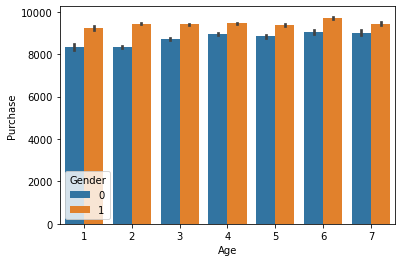

In [46]:
sns.barplot('Age', 'Purchase', data = df, hue = 'Gender')

### Here all the ppl of different age done somehow same purchase but the female do purchase less than the males 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

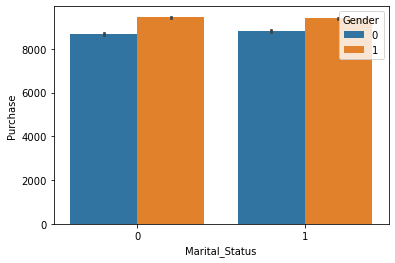

In [47]:
sns.barplot('Marital_Status', 'Purchase', data = df, hue = 'Gender')

### Same ratio between maried and non married but still womens do less shopping 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

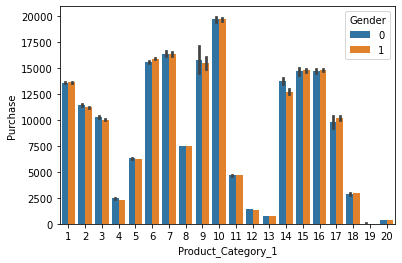

In [48]:
sns.barplot('Product_Category_1', 'Purchase', data = df, hue = 'Gender')

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

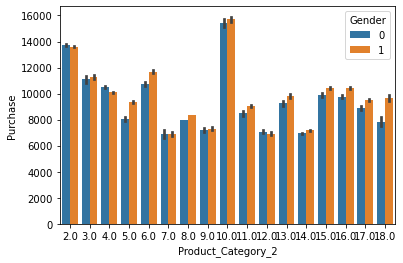

In [49]:
sns.barplot('Product_Category_2', 'Purchase', data = df, hue = 'Gender')

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

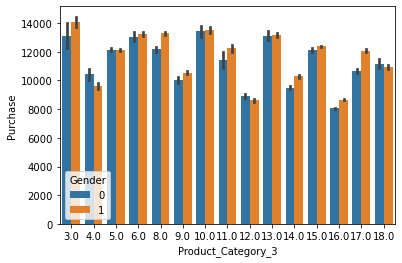

In [50]:
sns.barplot('Product_Category_3', 'Purchase', data = df, hue = 'Gender')

In [51]:
df.head()

,B,C,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0
1,0,0,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,0,0,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0
3,0,0,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0
4,0,1,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0


### Let's Now Seperate the train test split in train Data

In [53]:
train = df[~df['Purchase'].isnull()]

In [55]:
train.shape

(550068, 12)

## X and Y features along with train test spilt

In [58]:
x = df.drop('Purchase', axis = 1)
y = df['Purchase']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 4)

In [52]:
test = df[df['Purchase'].isnull()]

In [54]:
test.shape

(233599, 12)

In [56]:
test.columns

Index(['B', 'C', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [57]:
test.drop('Purchase', axis = 1, inplace = True)

C:\Users\seher\AppData\Local\Temp\ipykernel_10072\3678202166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Purchase', axis = 1, inplace = True)


# Let's Perfrom Feature Scaling using standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
x_train.drop('Product_ID', axis = 1, inplace = True)
x_test.drop('Product_ID', axis = 1, inplace = True)

In [64]:
ss = StandardScaler()

In [65]:
x_train = ss.fit_transform(x_train)

In [68]:
x_train

array([[ 1.17353529, -0.67261949,  0.57245331, ..., -0.09505958,
         1.09952034,  0.36908024],
       [ 1.17353529, -0.67261949,  0.57245331, ..., -0.09505958,
        -0.29458286,  0.36908024],
       [-0.85212606,  1.48672468, -1.74686737, ...,  1.45043844,
        -0.29458286,  0.36908024],
       ...,
       [-0.85212606,  1.48672468,  0.57245331, ..., -0.86780859,
        -0.99163446, -2.55016355],
       [-0.85212606, -0.67261949,  0.57245331, ...,  0.67768943,
         1.33187088,  0.36908024],
       [ 1.17353529, -0.67261949,  0.57245331, ..., -1.12539159,
         1.33187088,  0.36908024]])

In [66]:
x_test = ss.transform(x_test)

In [69]:
x_test

array([[-0.85212606,  1.48672468,  0.57245331, ..., -1.12539159,
         1.56422141,  0.36908024],
       [ 1.17353529, -0.67261949,  0.57245331, ..., -0.09505958,
        -0.06223232,  0.36908024],
       [ 1.17353529, -0.67261949,  0.57245331, ..., -1.12539159,
        -1.68868606,  0.00417477],
       ...,
       [ 1.17353529, -0.67261949,  0.57245331, ..., -0.35264258,
        -0.99163446, -2.55016355],
       [-0.85212606,  1.48672468, -1.74686737, ..., -0.09505958,
         1.09952034,  0.36908024],
       [-0.85212606,  1.48672468, -1.74686737, ..., -0.61022558,
        -1.22398499, -3.64487997]])